In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from lime_ieinn.image_explainer import ImageExplainer

In [9]:
digits = load_digits()
X, y = digits.images, digits.target
X_flat = X.reshape(len(X), -1)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_flat, y)
predict_fn = lambda imgs: clf.predict_proba(imgs.reshape(len(imgs), -1))

C:\Users\minas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


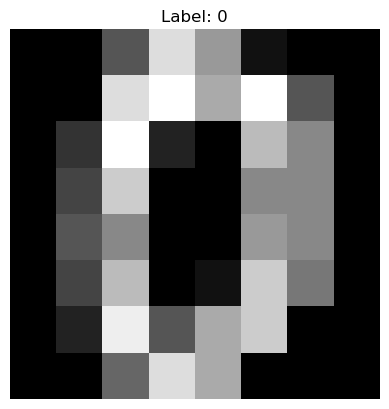

In [11]:
idx = 0
image = X[idx]
plt.imshow(image, cmap='gray')
plt.title(f"Label: {y[idx]}")
plt.axis('off')
plt.show()

In [13]:
explainer = ImageExplainer(kernel_width=0.25)
explanation, segments = explainer.explain_instance(image, predict_fn, num_samples=1000)

[[[[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 5.  5.  5.]
   ...
   [ 1.  1.  1.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [13. 13. 13.]
   ...
   [15. 15. 15.]
   [ 5.  5.  5.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 3.  3.  3.]
   [15. 15. 15.]
   ...
   [11. 11. 11.]
   [ 8.  8.  8.]
   [ 0.  0.  0.]]

  ...

  [[ 0.  0.  0.]
   [ 4.  4.  4.]
   [11. 11. 11.]
   ...
   [12. 12. 12.]
   [ 7.  7.  7.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 2.  2.  2.]
   [14. 14. 14.]
   ...
   [12. 12. 12.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 6.  6.  6.]
   ...
   [ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]]


 [[[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 5.  5.  5.]
   ...
   [ 1.  1.  1.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [13. 13. 13.]
   ...
   [15. 15. 15.]
   [ 5.  5.  5.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 3.  3.  3.]
   [15. 15. 15.]
   ...
   [11. 11. 11.]
   [ 8.  8.  8.]
   [ 0.  0.

In [15]:
print("Intercept:", explanation["intercept"])
print("Local prediction:", explanation["local_pred"])
print("Top segments:")
for sid, weight in explanation["local_exp"]:
    print(f"  Segment {sid}: weight={weight:.4f}")

Intercept: 0.9999999970606043
Local prediction: 0.9999999970606043
Top segments:
  Segment 0: weight=-0.0000
